# UB TU Freiberg Data Loading Pipeline (MAB2)

**Fokus:** Datenextraktion aus MAB2-Format der Universitätsbibliothek

## 🎯 Ziel
- Parse UB MAB2-Datei (027out.t)
- Extrahiere Grunddaten: Titel, Autoren, Jahr, ISBN
- Validiere und bereinige Basisdaten
- Export als standardisierte Parquet-Datei

## 📚 Input/Output
- **Input**: `data/ub_tubaf/raw/027out.t`
- **Output**: `data/ub_tubaf/processed/01_loaded_data.parquet`

## 🔍 MAB2 Format
- **Format**: MAB2 (Maschinelles Austauschformat für Bibliotheken)
- **Encoding**: Latin-1 (typisch für deutsche Bibliotheksdaten)
- **Record-Trenner**: `###` am Zeilenanfang

In [1]:
# 🛠️ SETUP: Initialize notebook environment
import sys
from pathlib import Path

# Add src to path
project_root = Path.cwd()
while not (project_root / 'config.yaml').exists() and project_root.parent != project_root:
    project_root = project_root.parent
sys.path.insert(0, str(project_root / 'src'))

# Use utility function
from utils.notebook_utils import setup_notebook

project_root, config = setup_notebook()
print(f"✅ Project root: {project_root}")
print(f"✅ Project: {config.get('project.name')} v{config.get('project.version')}")

2025-12-28 10:08:52 - utils.notebook_utils - INFO - Searching for project root...
2025-12-28 10:08:52 - utils.notebook_utils - INFO - Project root found: /media/sz/Data/Bibo/analysis
2025-12-28 10:08:52 - utils.notebook_utils - INFO - Loading configuration...
2025-12-28 10:08:52 - config_loader - INFO - Configuration loaded from /media/sz/Data/Bibo/analysis/config.yaml
2025-12-28 10:08:52 - utils.notebook_utils - INFO - Configuration loaded successfully: Dual-Source Bibliothek Bestandsvergleich


✅ Project root: /media/sz/Data/Bibo/analysis
✅ Project: Dual-Source Bibliothek Bestandsvergleich v2.2.0


In [2]:
# 📦 IMPORTS
import pandas as pd
import warnings
import logging

# Configure warnings
if not config.get('debug.verbose_output', True):
    warnings.filterwarnings('ignore')

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# Display UB data source configuration
ub_file = config.project_root / 'data/ub_tubaf/raw/027out.t'
print(f"📄 UB TU Freiberg Datenquelle")
print(f"📂 Dateipfad: {ub_file}")
print(f"🔤 Encoding: latin1 (MAB2 Standard)")
print(f"📊 Format: MAB2")

📄 UB TU Freiberg Datenquelle
📂 Dateipfad: /media/sz/Data/Bibo/analysis/data/ub_tubaf/raw/027out.t
🔤 Encoding: latin1 (MAB2 Standard)
📊 Format: MAB2


In [3]:
# 📊 MAB2-DATEN LADEN
print(f"📂 Lade UB MAB2-Datei: {ub_file}")
print(f"🎯 Format: MAB2")

# Prüfe ob Datei existiert
if not ub_file.exists():
    raise FileNotFoundError(f"UB MAB2-Datei nicht gefunden: {ub_file}")

# Dateigröße
file_size_mb = ub_file.stat().st_size / (1024 * 1024)
print(f"📏 Dateigröße: {file_size_mb:.1f} MB")

# MAB2 Parser importieren
from parsers.mab2_parser import MAB2Parser, analyze_mab2_data, get_sample_records_mab2

# Parser erstellen - kein Debug-Modus für bessere Performance bei großen Dateien
parser = MAB2Parser(
    debug_mode=False,  # Deaktiviert für bessere Performance
    debug_first_n=0,
    encoding='latin1'
)

# Daten laden (ohne Limit - alle Records)
# ACHTUNG: Kann bei großen Dateien lange dauern!
print("\n⏳ Starte Parsing... (dies kann einige Minuten dauern)")
df_ub = parser.parse_file(ub_file, max_records=None)

print(f"\n✅ DataFrame erstellt: {len(df_ub):,} Records")
print(f"💾 Speicherverbrauch: {df_ub.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"📋 Spalten: {list(df_ub.columns)}")

2025-12-28 10:08:52 - parsers.mab2_parser - INFO - 🔄 Lade MAB2-Datei: /media/sz/Data/Bibo/analysis/data/ub_tubaf/raw/027out.t
2025-12-28 10:08:52 - parsers.mab2_parser - INFO - 📊 Encoding: latin1


📂 Lade UB MAB2-Datei: /media/sz/Data/Bibo/analysis/data/ub_tubaf/raw/027out.t
🎯 Format: MAB2
📏 Dateigröße: 754.0 MB

⏳ Starte Parsing... (dies kann einige Minuten dauern)


2025-12-28 10:09:02 - parsers.mab2_parser - INFO - 📋 Gefundene Records: 518,954
2025-12-28 10:09:03 - parsers.mab2_parser - INFO - 📊 Verarbeitet: 1,000 Records (Erfolgsrate: 100.0%)
2025-12-28 10:09:03 - parsers.mab2_parser - INFO - 📊 Verarbeitet: 2,000 Records (Erfolgsrate: 100.0%)
2025-12-28 10:09:03 - parsers.mab2_parser - INFO - 📊 Verarbeitet: 3,000 Records (Erfolgsrate: 100.0%)
2025-12-28 10:09:03 - parsers.mab2_parser - INFO - 📊 Verarbeitet: 4,000 Records (Erfolgsrate: 100.0%)
2025-12-28 10:09:03 - parsers.mab2_parser - INFO - 📊 Verarbeitet: 5,000 Records (Erfolgsrate: 100.0%)
2025-12-28 10:09:03 - parsers.mab2_parser - INFO - 📊 Verarbeitet: 6,000 Records (Erfolgsrate: 100.0%)
2025-12-28 10:09:03 - parsers.mab2_parser - INFO - 📊 Verarbeitet: 7,000 Records (Erfolgsrate: 100.0%)
2025-12-28 10:09:03 - parsers.mab2_parser - INFO - 📊 Verarbeitet: 8,000 Records (Erfolgsrate: 100.0%)
2025-12-28 10:09:03 - parsers.mab2_parser - INFO - 📊 Verarbeitet: 9,000 Records (Erfolgsrate: 100.0%)
20


✅ DataFrame erstellt: 518,946 Records
💾 Speicherverbrauch: 846.6 MB
📋 Spalten: ['id', 'source', 'title', 'authors', 'authors_str', 'year', 'isbn', 'place', 'physical_desc', 'original_fields', 'title_candidates', 'year_original', 'isbn_candidates']


In [4]:
# 📊 FELD-STATISTIKEN
print("📊 === MAB2 FELD-STATISTIKEN ===\n")

# Hole Parser-Statistiken
stats = parser.get_field_statistics()

print("Parsing Erfolg:")
for key, value in stats['parsing_stats'].items():
    if isinstance(value, float):
        print(f"   {key}: {value:.2%}")
    else:
        print(f"   {key}: {value:,}")

print("\nTop 20 häufigste MAB-Felder:")
for field_code, count in stats['field_frequencies'].items():
    print(f"   Feld {field_code}: {count:,} Vorkommen")

📊 === MAB2 FELD-STATISTIKEN ===

Parsing Erfolg:
   total_records: 518,954
   parsed_records: 518,946
   error_records: 0
   success_rate: 100.00%

Top 20 häufigste MAB-Felder:
   Feld 700: 1,320,521 Vorkommen
   Feld 026: 1,114,567 Vorkommen
   Feld 425: 940,996 Vorkommen
   Feld 902: 859,152 Vorkommen
   Feld 025: 853,393 Vorkommen
   Feld 088: 609,018 Vorkommen
   Feld 060: 521,616 Vorkommen
   Feld 062: 519,681 Vorkommen
   Feld 061: 519,624 Vorkommen
   Feld 001: 518,954 Vorkommen
   Feld 002: 518,954 Vorkommen
   Feld 003: 518,954 Vorkommen
   Feld 030: 518,954 Vorkommen
   Feld 070: 518,954 Vorkommen
   Feld 050: 518,942 Vorkommen
   Feld 037: 505,093 Vorkommen
   Feld 331: 497,067 Vorkommen
   Feld 051: 468,115 Vorkommen
   Feld 433: 456,595 Vorkommen
   Feld 655: 449,223 Vorkommen


In [5]:
# 🔍 ERSTEN RECORD ANZEIGEN
print("📖 === BEISPIEL RECORD ===\n")
if len(df_ub) > 0:
    display(df_ub.iloc[0])
else:
    print("⚠️  Keine Daten geladen!")

📖 === BEISPIEL RECORD ===



id                                                              00499
source                                                  ub_tubaf_mab2
title               Geologische Karte von Bayern <1:25000> : Geolo...
authors                             [Bayern / Geologisches Landesamt]
authors_str                           Bayern / Geologisches Landesamt
year                                                              NaN
isbn                                                             None
place                                                         München
physical_desc                                   Je Bl. 47,5 x 44,5 cm
original_fields     {'001': '073871532', '002': '20020501', '003':...
title_candidates    [Geologische Karte von Bayern <1:25000>, Geolo...
year_original                                                     NaN
isbn_candidates                                                   NaN
Name: 0, dtype: object

In [6]:
# 📋 STICHPROBE VON RECORDS
print("📋 === STICHPROBE (erste 10 Records) ===\n")
sample = get_sample_records_mab2(df_ub, n=10)
display(sample)

📋 === STICHPROBE (erste 10 Records) ===



,id,title,authors_str,year,isbn,place
0,00499,Geologische Karte von Bayern <1:25000> : Geolo...,Bayern / Geologisches Landesamt,NaN,None,München
1,00599,[Karte] : bearb. von Ch. Kuhnert,"Kuhnert, Christian ; Bayern / Geologisches Lan...",1967.0,None,München
2,00481,Verzeichnis staatlicher Standards der DDR,"Deutschland <DDR> / Amt für Standardisierung, ...",1986.0,3740500719,Berlin
3,00718,Sachteil (2.0.) - (662.0),"Deutschland <DDR> / Amt für Standardisierung, ...",1989.0,9125700332,Berlin
4,01593,Sudhoffs Archiv für Geschichte der Medizin und...,None,1934.0,None,Wiesbaden
5,01505,Marxistische Blätter,August-Bebel-Gesellschaft,1963.0,None,Essen
6,02008,"Operations research proceedings : GOR, Gesells...",Gesellschaft für Operations-Research,1981.0,None,"Berlin ; Heidelberg ; New York, NY ; London ; ..."
7,00703,None,None,1982.0,3540116303,None
8,01302,Salzburger geographische Arbeiten : Geographis...,Geographisches Institut <Salzburg>,1984.0,None,Salzburg
9,01798,Bundesanzeiger / Beilage : Bundesanzeiger,Deutschland,1990.0,None,Köln


In [7]:
# 📊 STANDARDNUMMERN-ANALYSE (ISBN)
print("=== STANDARDNUMMERN ANALYSE ===\n")

# ISBN Analyse
isbn_total = df_ub['isbn'].notna().sum()
print("ISBN Analyse:")
print(f"Anzahl Datensätze mit ISBN: {isbn_total:,}")
print(f"Prozent der Datensätze mit ISBN: {(isbn_total/len(df_ub)*100):.2f}%")

if isbn_total > 0:
    # ISBN Längenanalyse
    df_with_isbn = df_ub[df_ub['isbn'].notna()]
    isbn_lengths = df_with_isbn['isbn'].astype(str).str.len().value_counts().sort_index()
    print("\nISBN Längen:")
    for length, count in isbn_lengths.items():
        print(f"   {length} Stellen: {count:,} ISBNs ({count/isbn_total*100:.1f}%)")
    
    print("\nBeispiel ISBNs:")
    sample_with_isbn = df_with_isbn.sample(n=min(5, len(df_with_isbn)), random_state=42)
    for _, row in sample_with_isbn.iterrows():
        title_display = row['title'][:60] + "..." if row['title'] and len(row['title']) > 60 else row['title']
        print(f"   ISBN: {row['isbn']} | Titel: {title_display}")

=== STANDARDNUMMERN ANALYSE ===

ISBN Analyse:
Anzahl Datensätze mit ISBN: 289,292
Prozent der Datensätze mit ISBN: 55.75%

ISBN Längen:
   10 Stellen: 166,212 ISBNs (57.5%)
   13 Stellen: 123,080 ISBNs (42.5%)

Beispiel ISBNs:
   ISBN: 1076935605 | Titel: Epk - Er
   ISBN: 9783030776268 | Titel: Social Computing and Social Media: Experience Design and Soc...
   ISBN: 9783642242977 | Titel: Photovoltaik : von Viktor Wesselak, Sebastian Voswinckel
   ISBN: 9781461434559 | Titel: Nonoscillation Theory of Functional Differential Equations w...
   ISBN: 0387986219 | Titel: Mathematical statistics : George R. Terrell


In [8]:
# 📈 VOLLSTÄNDIGE DATENANALYSE
print("📈 === UB MAB2 DATENANALYSE ===\n")
analyze_mab2_data(df_ub)

2025-12-28 10:09:59 - parsers.mab2_parser - INFO - 
📊 === MAB2 DATENANALYSE ===
2025-12-28 10:09:59 - parsers.mab2_parser - INFO - 📋 Datensatz: 518,946 Records
2025-12-28 10:09:59 - parsers.mab2_parser - INFO - 
🔍 === VOLLSTÄNDIGKEITS-ANALYSE ===


📈 === UB MAB2 DATENANALYSE ===



2025-12-28 10:09:59 - parsers.mab2_parser - INFO - 📖 Records mit Titel: 497,797 (95.9%)
2025-12-28 10:09:59 - parsers.mab2_parser - INFO - ✍️  Records mit Autor: 451,331 (87.0%)
2025-12-28 10:09:59 - parsers.mab2_parser - INFO - 📅 Records mit Jahr: 496,993 (95.8%)
2025-12-28 10:09:59 - parsers.mab2_parser - INFO - 📚 Records mit ISBN: 289,292 (55.7%)
2025-12-28 10:09:59 - parsers.mab2_parser - INFO - 
📅 === JAHRES-VERTEILUNG ===
2025-12-28 10:09:59 - parsers.mab2_parser - INFO - Ältestes Jahr: 1437.0
2025-12-28 10:09:59 - parsers.mab2_parser - INFO - Neuestes Jahr: 2027.0
2025-12-28 10:09:59 - parsers.mab2_parser - INFO - Durchschnitt: 1978.7
2025-12-28 10:09:59 - parsers.mab2_parser - INFO - 
✍️  === TOP 5 AUTOREN ===
2025-12-28 10:10:00 - parsers.mab2_parser - INFO -    Technische Universität Bergakademie Freiberg: 1,189 Records
2025-12-28 10:10:00 - parsers.mab2_parser - INFO -    OECD: 299 Records
2025-12-28 10:10:00 - parsers.mab2_parser - INFO -    Deutsches Institut für Normung: 

📊 Jahres-Verteilung (496,993 Records mit Jahr)



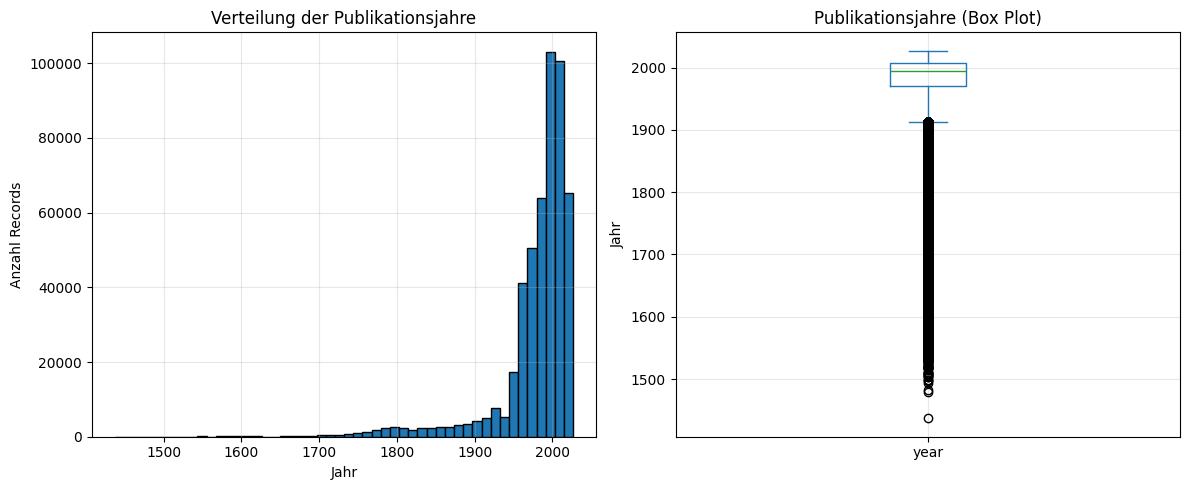


Jahres-Statistik:
count    496993.000000
mean       1978.749779
std          52.623811
min        1437.000000
25%        1970.000000
50%        1994.000000
75%        2008.000000
max        2027.000000
Name: year, dtype: float64


In [9]:
# 📅 JAHRES-VERTEILUNG VISUALISIERUNG
import matplotlib.pyplot as plt

df_with_year = df_ub[df_ub['year'].notna()]
if len(df_with_year) > 0:
    print(f"📊 Jahres-Verteilung ({len(df_with_year):,} Records mit Jahr)\n")
    
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    df_with_year['year'].hist(bins=50, edgecolor='black')
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl Records')
    plt.title('Verteilung der Publikationsjahre')
    plt.grid(alpha=0.3)
    
    # Box plot
    plt.subplot(1, 2, 2)
    df_with_year['year'].plot(kind='box')
    plt.ylabel('Jahr')
    plt.title('Publikationsjahre (Box Plot)')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistik
    print("\nJahres-Statistik:")
    print(df_with_year['year'].describe())
else:
    print("⚠️  Keine Jahresangaben gefunden!")

In [10]:
# 💾 GELADENE DATEN EXPORTIEREN
processed_dir = config.project_root / 'data/ub_tubaf/processed'
processed_dir.mkdir(parents=True, exist_ok=True)

# Export als Parquet für nächste Pipeline-Stufe
output_path = processed_dir / '01_loaded_data.parquet'

# Entferne Debug-Spalten vor dem Export (zu groß)
columns_to_export = ['id', 'source', 'title', 'authors', 'authors_str', 
                     'year', 'isbn', 'place', 'physical_desc']
df_export = df_ub[columns_to_export].copy()

df_export.to_parquet(output_path, index=False)

print(f"💾 === DATEN LOADING ABGESCHLOSSEN ===\n")
print(f"✅ Geladene Daten exportiert: {output_path}")
print(f"📊 Records: {len(df_export):,}")
print(f"📋 Spalten: {len(df_export.columns)}")
print(f"💾 Dateigröße: {df_export.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Metadaten für nächste Stufe
import json

# Konvertiere stats für JSON (ohne NaN/Inf)
field_stats = parser.get_field_statistics()

metadata = {
    'stage': '01_data_loading',
    'records_loaded': len(df_ub),
    'records_exported': len(df_export),
    'columns': list(df_export.columns),
    'source_file': str(ub_file),
    'processing_date': pd.Timestamp.now().isoformat(),
    'format': 'MAB2',
    'encoding': 'latin1',
    'parsing_stats': {
        'total_records': field_stats['parsing_stats']['total_records'],
        'parsed_records': field_stats['parsing_stats']['parsed_records'],
        'error_records': field_stats['parsing_stats']['error_records'],
        'success_rate': float(field_stats['parsing_stats']['success_rate'])
    },
    'top_fields': dict(list(field_stats['field_frequencies'].items())[:10])
}

metadata_path = processed_dir / '01_metadata.json'
with open(metadata_path, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=2, ensure_ascii=False)

print(f"📄 Metadaten gespeichert: {metadata_path}")
print(f"\n➡️  Nächster Schritt: Datenvergleich mit VDEH")

💾 === DATEN LOADING ABGESCHLOSSEN ===

✅ Geladene Daten exportiert: /media/sz/Data/Bibo/analysis/data/ub_tubaf/processed/01_loaded_data.parquet
📊 Records: 518,946
📋 Spalten: 9
💾 Dateigröße: 314.3 MB
📄 Metadaten gespeichert: /media/sz/Data/Bibo/analysis/data/ub_tubaf/processed/01_metadata.json

➡️  Nächster Schritt: Datenvergleich mit VDEH


In [11]:
# 🔍 SCHNELLER VERGLEICH MIT VDEH (optional)
print("🔍 === QUICK COMPARISON: UB vs VDEH ===\n")

# Lade VDEH Daten falls vorhanden
vdeh_processed = config.project_root / 'data/vdeh/processed/01_loaded_data.parquet'

if vdeh_processed.exists():
    df_vdeh = pd.read_parquet(vdeh_processed)
    
    comparison = pd.DataFrame({
        'Metrik': ['Records Total', 'Mit Titel', 'Mit Autor', 'Mit Jahr', 'Mit ISBN'],
        'UB TU Freiberg': [
            len(df_ub),
            df_ub['title'].notna().sum(),
            df_ub['authors_str'].notna().sum(),
            df_ub['year'].notna().sum(),
            df_ub['isbn'].notna().sum()
        ],
        'VDEH': [
            len(df_vdeh),
            df_vdeh['title'].notna().sum(),
            df_vdeh['authors_str'].notna().sum(),
            df_vdeh['year'].notna().sum(),
            df_vdeh['isbn'].notna().sum()
        ]
    })
    
    comparison['UB %'] = (comparison['UB TU Freiberg'] / len(df_ub) * 100).round(1)
    comparison['VDEH %'] = (comparison['VDEH'] / len(df_vdeh) * 100).round(1)
    
    display(comparison)
else:
    print("⚠️  VDEH Daten noch nicht geladen. Bitte zuerst 01_vdeh_data_loading.ipynb ausführen.")

🔍 === QUICK COMPARISON: UB vs VDEH ===



,Metrik,UB TU Freiberg,VDEH,UB %,VDEH %
0,Records Total,518946,58305,100.0,100.0
1,Mit Titel,497797,58242,95.9,99.9
2,Mit Autor,451331,58305,87.0,100.0
3,Mit Jahr,496993,33313,95.8,57.1
4,Mit ISBN,289292,10507,55.7,18.0
